In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

import xgboost as xgb
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

<Figure size 720x720 with 0 Axes>

In [5]:
def extract_month(s):
    return int(s[5:7])

def preprocess_data(data_path, train_set=False): # normal
    df = pd.read_csv(data_path)
    print('original shape', df.shape)
    
    months = df.week_start_date.apply(extract_month)
#     month_features = pd.get_dummies(months, prefix='m_')
    df['months'] = months

    x_features = df.columns.values
    ex_features = [
        'city', 'year', 'week_start_date'
    ]
    x_features = [c for c in df if c not in ex_features]
    
#     if train_set:
#         label_df = pd.read_csv('dengue_labels_train.csv')
#         label_df.drop(df[df.isnull().sum(axis=1) > 4].index, inplace=True)
#         label_df.to_csv('dengue_labels_train_f.csv', index=False)
        
#         df.drop(df[df.isnull().sum(axis=1) > 4].index, inplace=True)

    predicted_df = {}

    for c in x_features:
        test_index = df[df[c].isnull()].index
        train_index = df[~df[c].isnull()].index

        corr = df.corr()
        x_columns = abs(corr[c]).sort_values().index[-10:-1]
        
        train_df = df.loc[train_index]
        test_df = df.loc[test_index]

        print(c, 'train', train_df.shape, 'test', test_df.shape),

        x_train = train_df[x_columns]
        y_train = train_df[c]
        x_test = test_df[x_columns]
        y_test = test_df[c]

        model = xgb.XGBRegressor(objective ='reg:linear')
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.Series(predict)
        y_test.index = test_index

        y = pd.concat([y_train, y_test], axis=0)
        y.sort_index(inplace=True)
        df[c] = y
        predicted_df[c] = y_test

    print('last shape', df.shape)
    return df

In [6]:
df = preprocess_data('dengue_features_train.csv', train_set=True)
df.to_csv('dengue_features_train_f.csv', index=False)
# (1456, 24) >>> (1446, 24)

original shape (1456, 24)
weekofyear train (1456, 25) test (0, 25)
ndvi_ne train (1262, 25) test (194, 25)
ndvi_nw train (1404, 25) test (52, 25)
ndvi_se train (1434, 25) test (22, 25)
ndvi_sw train (1434, 25) test (22, 25)
precipitation_amt_mm train (1443, 25) test (13, 25)
reanalysis_air_temp_k train (1446, 25) test (10, 25)
reanalysis_avg_temp_k train (1446, 25) test (10, 25)
reanalysis_dew_point_temp_k train (1446, 25) test (10, 25)
reanalysis_max_air_temp_k train (1446, 25) test (10, 25)
reanalysis_min_air_temp_k train (1446, 25) test (10, 25)
reanalysis_precip_amt_kg_per_m2 train (1446, 25) test (10, 25)
reanalysis_relative_humidity_percent train (1446, 25) test (10, 25)
reanalysis_sat_precip_amt_mm train (1443, 25) test (13, 25)
reanalysis_specific_humidity_g_per_kg train (1446, 25) test (10, 25)
reanalysis_tdtr_k train (1446, 25) test (10, 25)
station_avg_temp_c train (1413, 25) test (43, 25)
station_diur_temp_rng_c train (1413, 25) test (43, 25)
station_max_temp_c train (1436,

In [7]:
df = preprocess_data('dengue_features_test.csv', train_set=False)
df.to_csv('dengue_features_test_f.csv', index=False)
# (416, 24) >>> (416, 24)

original shape (416, 24)
weekofyear train (416, 25) test (0, 25)
ndvi_ne train (373, 25) test (43, 25)
ndvi_nw train (405, 25) test (11, 25)
ndvi_se train (415, 25) test (1, 25)
ndvi_sw train (415, 25) test (1, 25)
precipitation_amt_mm train (414, 25) test (2, 25)
reanalysis_air_temp_k train (414, 25) test (2, 25)
reanalysis_avg_temp_k train (414, 25) test (2, 25)
reanalysis_dew_point_temp_k train (414, 25) test (2, 25)
reanalysis_max_air_temp_k train (414, 25) test (2, 25)
reanalysis_min_air_temp_k train (414, 25) test (2, 25)
reanalysis_precip_amt_kg_per_m2 train (414, 25) test (2, 25)
reanalysis_relative_humidity_percent train (414, 25) test (2, 25)
reanalysis_sat_precip_amt_mm train (414, 25) test (2, 25)
reanalysis_specific_humidity_g_per_kg train (414, 25) test (2, 25)
reanalysis_tdtr_k train (414, 25) test (2, 25)
station_avg_temp_c train (404, 25) test (12, 25)
station_diur_temp_rng_c train (404, 25) test (12, 25)
station_max_temp_c train (413, 25) test (3, 25)
station_min_temp

In [33]:
df = pd.read_csv('dengue_features_train.csv')

In [40]:
months = df.week_start_date.apply(extract_month)
month_features = pd.get_dummies(months, prefix='m_')
df['months'] = months

In [41]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,months
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,5
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,5
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,5


In [39]:
months

0        4
1        5
2        5
3        5
4        5
5        6
6        6
7        6
8        6
9        7
10       7
11       7
12       7
13       7
14       8
15       8
16       8
17       8
18       9
19       9
20       9
21       9
22      10
23      10
24      10
25      10
26      10
27      11
28      11
29      11
        ..
1426    12
1427    12
1428    12
1429    12
1430     1
1431     1
1432     1
1433     1
1434     1
1435     2
1436     2
1437     2
1438     2
1439     3
1440     3
1441     3
1442     3
1443     4
1444     4
1445     4
1446     4
1447     4
1448     5
1449     5
1450     5
1451     5
1452     6
1453     6
1454     6
1455     6
Name: week_start_date, Length: 1456, dtype: int64

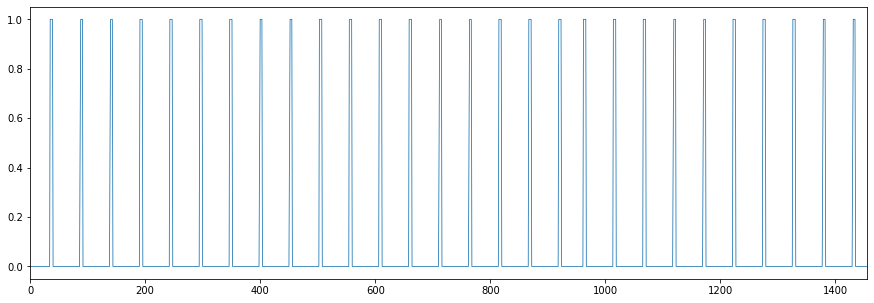

In [19]:
plt.figure(figsize=(15,5))
df.m__1.plot.line(lw=0.8)

In [ ]:
def preprocess_data(data_path, train_set=False):  # normal
    df = pd.read_csv(data_path)
    print('original shape', df.shape)

    x_features = df.columns.values
    ex_features = [
        'city', 'year', 'week_start_date'
    ]
    x_features = [c for c in df if c not in ex_features]
    
    if train_set:
        df.drop(df[df.isnull().sum(axis=1) > 4].index, inplace=True)

    predicted_df = {}

    for c in x_features:
        test_index = df[df[c].isnull()].index
        train_index = df[~df[c].isnull()].index

        corr = df.corr()
        x_columns = abs(corr[c]).sort_values().index[-10:-1]

        train_df = df.loc[train_index]
        test_df = df.loc[test_index]

        print(c, 'train', train_df.shape, 'test', test_df.shape)
        print()

        x_train = train_df[x_columns]
        y_train = train_df[c]
        x_test = test_df[x_columns]
        y_test = test_df[c]

        model = xgb.XGBRegressor(objective ='reg:linear')
        model.fit(x_train, y_train)
        predict = model.predict(x_test)
        y_test = pd.Series(predict)
        y_test.index = test_index

        y = pd.concat([y_train, y_test], axis=0)
        y.sort_index(inplace=True)
        df[c] = y
        predicted_df[c] = y_test

    print('last shape', df.shape)
    return df

In [ ]:
def preprocess_data(data_path, train_set=False):  # city vise version
    df = pd.read_csv(data_path)
    print('original shape', df.shape)
    
    if train_set:
        df.drop(df[df.isnull().sum(axis=1) > 4].index, inplace=True)

    x_features = df.columns.values
    ex_features = [
        'city', 'year', 'week_start_date',
        'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'ndvi_ne'
    ]
    x_features = [c for c in df if c not in ex_features]
    
    city_df = [
        df[df['city']=='sj'],
        df[df['city']=='iq']
    ]

    for c in x_features:
        for c_df in city_df:
            test_index = c_df[c_df[c].isnull()].index
            train_index = c_df[~c_df[c].isnull()].index
            
            corr = c_df.corr()
            x_columns = abs(corr[c]).sort_values().index[-10:-1]

            train_df = c_df.loc[train_index]
            test_df = c_df.loc[test_index]

            print(c, 'train', train_df.shape, 'test', test_df.shape)

            x_train = train_df[x_columns]
            y_train = train_df[c]
            x_test = test_df[x_columns]
            y_test = test_df[c]

            model = xgb.XGBRegressor(objective ='reg:linear')
            model.fit(x_train, y_train)
            predict = model.predict(x_test)
            y_test = pd.Series(predict)
            y_test.index = test_index

            y = pd.concat([y_train, y_test], axis=0)
            y.sort_index(inplace=True)
            c_df[c] = y
            
    df= pd.concat([city_df[0], city_df[1]])

    print('last shape', df.shape)
    return df